In [1]:
## Système dissipatif avec oscillation linéaire (régime d'oscillation libre)


In [7]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 18})

In [8]:
k=100 # raideur [N/m]
m=1.8 # masse [kg]
omega_0=np.sqrt(k/m) # pulsation propre
# conditions initiales
x0=0.02# position de lâché

# vitesses de lâché
x0_prime0=0
x0_primem1=-1
x0_prime1=1

t=np.arange(0,10*2*np.pi/omega_0,0.001) # temps

In [9]:
## Système dissipatif (régime d'oscillations libres)

SyntaxError: invalid syntax (2426469696.py, line 1)

Text(0, 0.5, '$x \\, (m)$')

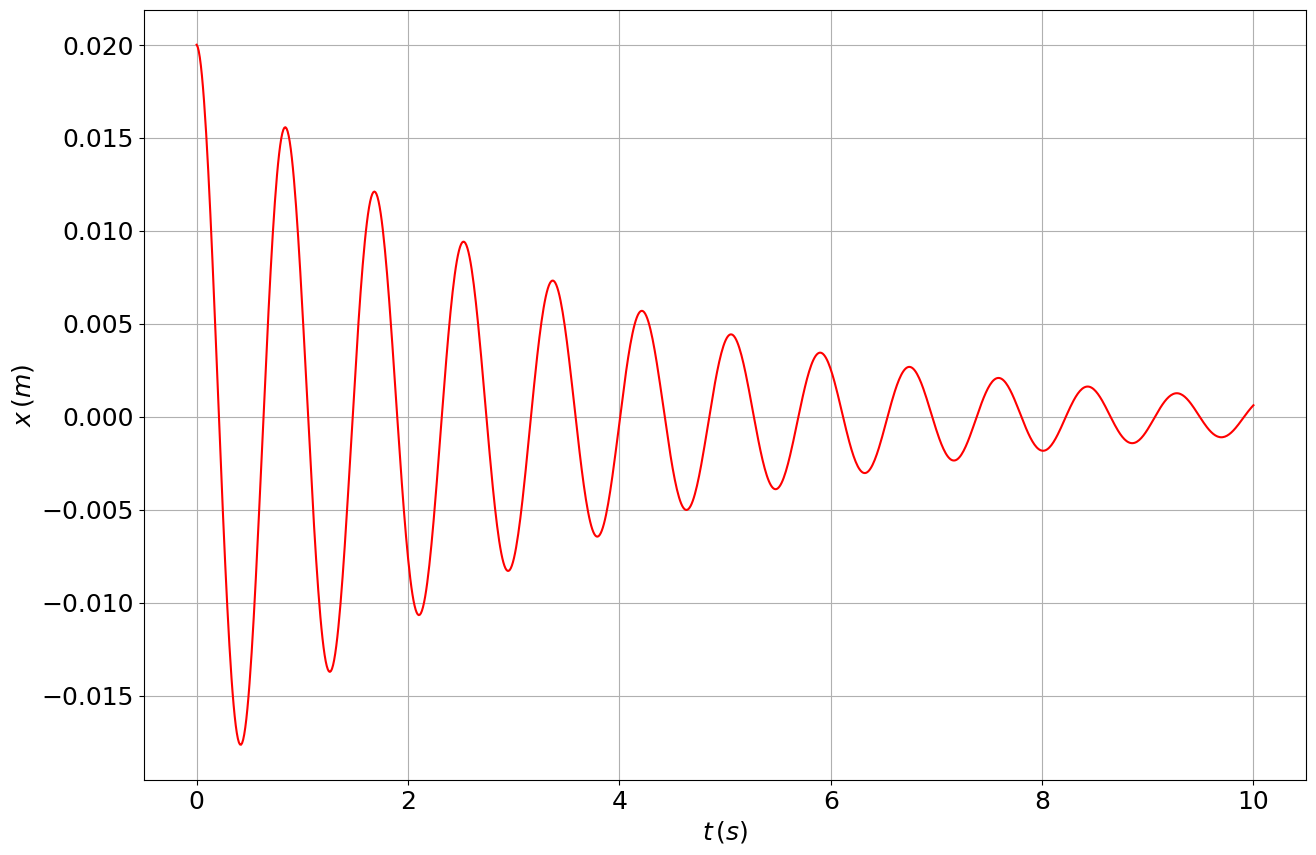

In [28]:
# Cas dissipatif sous-amortis
xi_sousamorti1=0.04;b_sousamorti1=xi_sousamorti1*2*m*omega_0;
x_diss_sousamorti1=np.exp(-xi_sousamorti1*omega_0*t)*(x0*np.cos(omega_0*np.sqrt(1-xi_sousamorti1**2)*t)+x0_prime0/omega_0/np.sqrt(1-xi_sousamorti1**2)*np.sin(omega_0*np.sqrt(1-xi_sousamorti1**2)*t))



x_diss_sousamorti1_m1=np.exp(-xi_sousamorti1*omega_0*t)*(x0*np.cos(omega_0*np.sqrt(1-xi_sousamorti1**2)*t)+x0_primem1/omega_0/np.sqrt(1-xi_sousamorti1**2)*np.sin(omega_0*np.sqrt(1-xi_sousamorti1**2)*t))

x_diss_sousamorti1_1=np.exp(-xi_sousamorti1*omega_0*t)*(x0*np.cos(omega_0*np.sqrt(1-xi_sousamorti1**2)*t)+x0_prime1/omega_0/np.sqrt(1-xi_sousamorti1**2)*np.sin(omega_0*np.sqrt(1-xi_sousamorti1**2)*t))


plt.figure(1)

plt.plot(t,x_diss_sousamorti1,'r')

plt.grid()
plt.xlabel("$t \, (s)$")
plt.ylabel("$x \, (m)$")

IndexError: index 10000 is out of bounds for axis 0 with size 1000

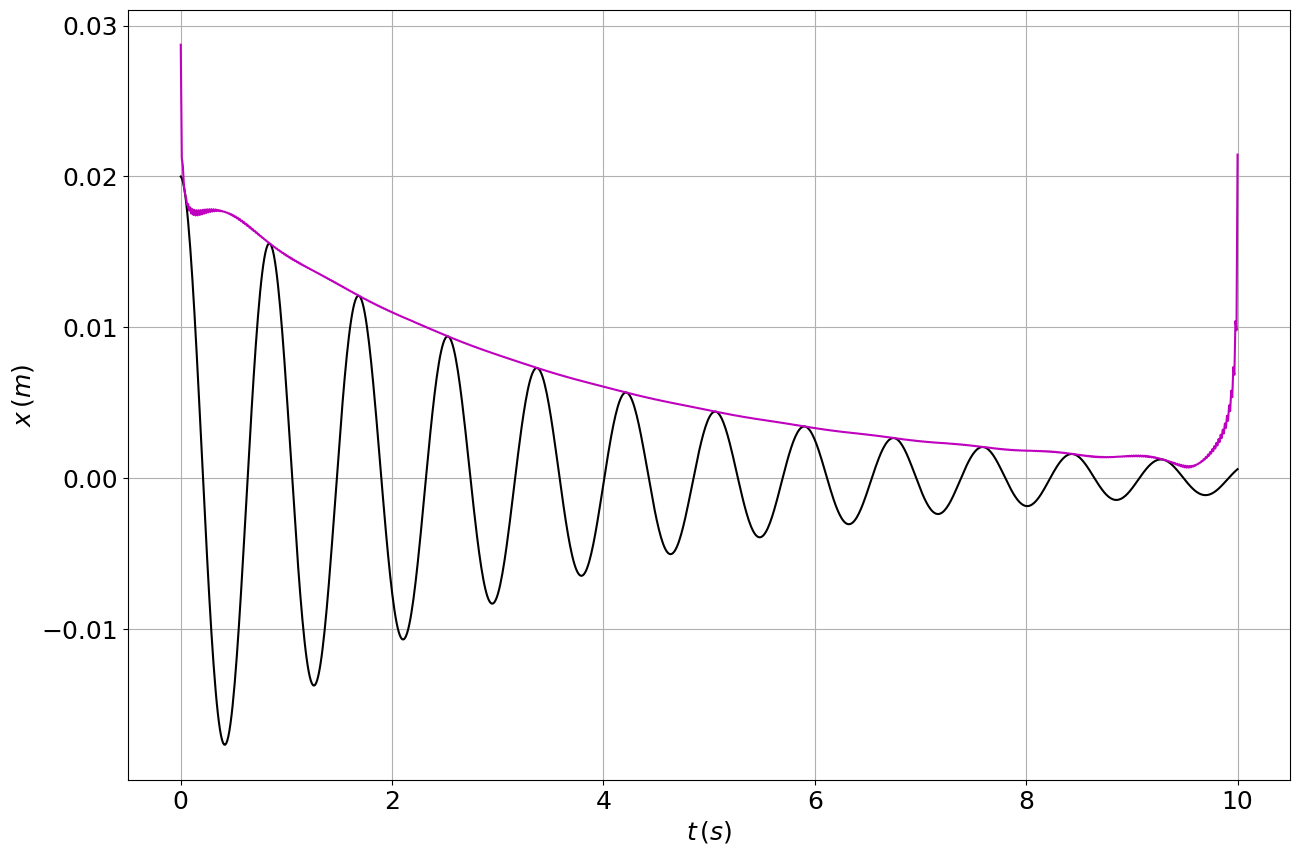

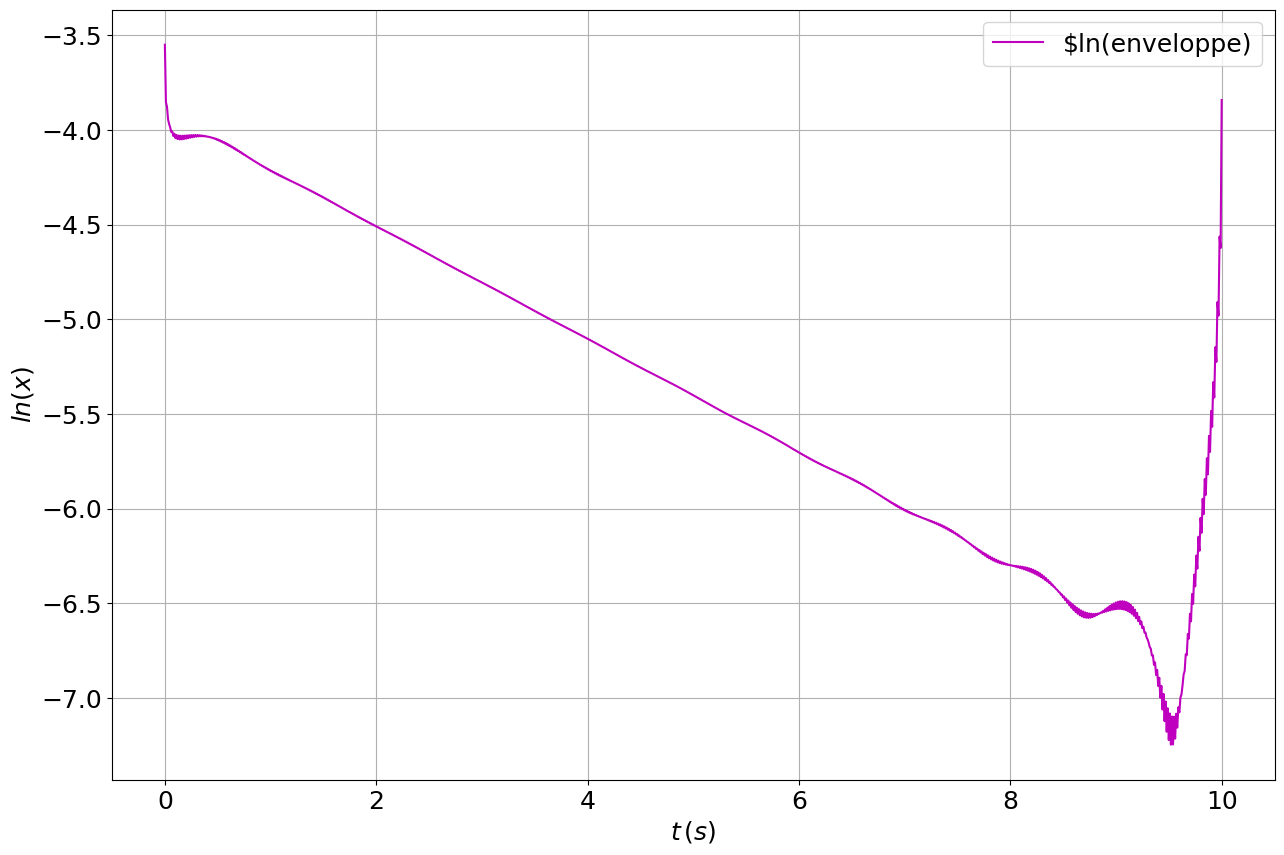

In [29]:
from scipy.signal import hilbert

# Détermination de l'enveloppe de signaux amortis
hilbert_sousamorti1=hilbert(x_diss_sousamorti1)
env_sousamorti1=np.abs(hilbert_sousamorti1)

# plage de mesure du taux d'amortissement
inc_debut=10000
inc_fin=50000

plt.figure(1)
plt.plot(t,x_diss_sousamorti1,'k')
plt.plot(t,env_sousamorti1,'m')
plt.grid()
plt.xlabel("$t \, (s)$")
plt.ylabel("$x \, (m)$")

plt.figure(2)
plt.plot(t,np.log(env_sousamorti1),'m')
plt.plot(t[inc_debut:inc_fin],np.log(env_sousamorti1)[inc_debut:inc_fin],'k--')
plt.grid()
plt.xlabel("$t \, (s)$")
plt.ylabel("$ln(x)$")
plt.legend(["$ln(enveloppe)"]);

print("xi_sousamorti1_test",(np.log(env_sousamorti1)[inc_debut]-np.log(env_sousamorti1)[inc_fin])/(t[inc_fin]-t[inc_debut])/omega_0)


In [ ]:
### Tracé temporelle de l'équation de mouvement en oscillations forcée

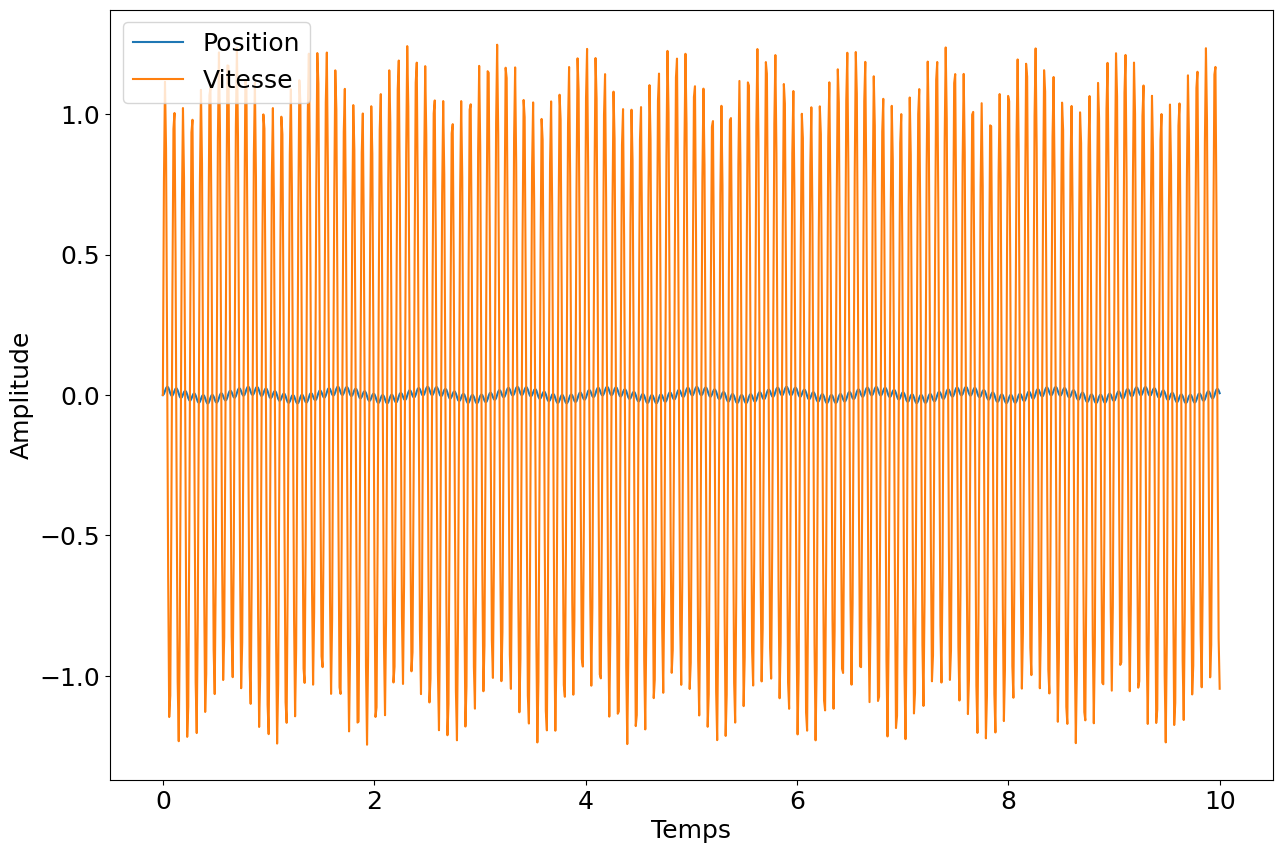

In [47]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Paramètres du système
m = 1.8       # Masse
b = 0.04       # Coefficient d'amortissement
k = 100      # Constante de raideur du ressort
F0 = 150     # Amplitude de la force excitatrice
w = 74       # Fréquence de la force excitatrice

# Définition de l'équation différentielle du système masse-ressort
def systeme(y, t):
    x, v = y
    dxdt = v
    dvdt = (1/m) * (-b*v - k*x + F0*np.cos(w*t))
    return [dxdt, dvdt]

# Conditions initiales
y0 = [0.0, 0.0]

# Intervalle de temps
t = np.linspace(0, 10, 1000)

# Résolution de l'équation différentielle
solution = odeint(systeme, y0, t)

# Extraction des positions et vitesses
x, v = solution.T

# Tracé des résultats
plt.plot(t, x, label='Position')
plt.plot(t, v, label='Vitesse')
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [48]:
### Résonnance en déplacement

In [49]:
omega=np.arange(0.0001,5,0.0002)*omega_0

xim3=0.01;xim2=0.05;xim1=0.1;xip1=2

kH_m3=1/(1-(omega**2)/(omega_0**2)+1j*2 *xim3*omega/omega_0)
kH_mod_m3=1/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xim3**2*(omega**2)/(omega_0**2))
omega_d_m3=omega_0*np.sqrt(1-2*xim3**2)
kH_mod_max_m3=1/2/xim3/np.sqrt(1-xim3**2)

kH_m2=1/(1-(omega**2)/(omega_0**2)+1j*2*xim2*omega/omega_0)
kH_mod_m2=1/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xim2**2*(omega**2)/(omega_0**2))
omega_d_m2=omega_0*np.sqrt(1-2*xim2**2)
kH_mod_max_m2=1/2/xim2/np.sqrt(1-xim2**2)

kH_m1=1/(1-(omega**2)/(omega_0**2)+1j*2*xim1*omega/omega_0)
kH_mod_m1=1/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xim1**2*(omega**2)/(omega_0**2))
omega_d_m1=omega_0*np.sqrt(1-2*xim1**2)
kH_mod_max_m1=1/2/xim1/np.sqrt(1-xim1**2)

kH_crit=1/(1-(omega**2)/(omega_0**2)+1j*2*omega/omega_0)
kH_mod_crit=1/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*(omega**2)/(omega_0**2))

kH_p1=1/(1-(omega**2)/(omega_0**2)+1j*2*xip1*omega/omega_0)
kH_mod_p1=1/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xip1**2*(omega**2)/(omega_0**2))

xim3_test 0.010000000000000028
xim2_test 0.050100000000000054
xim1_test 0.10109999999999994


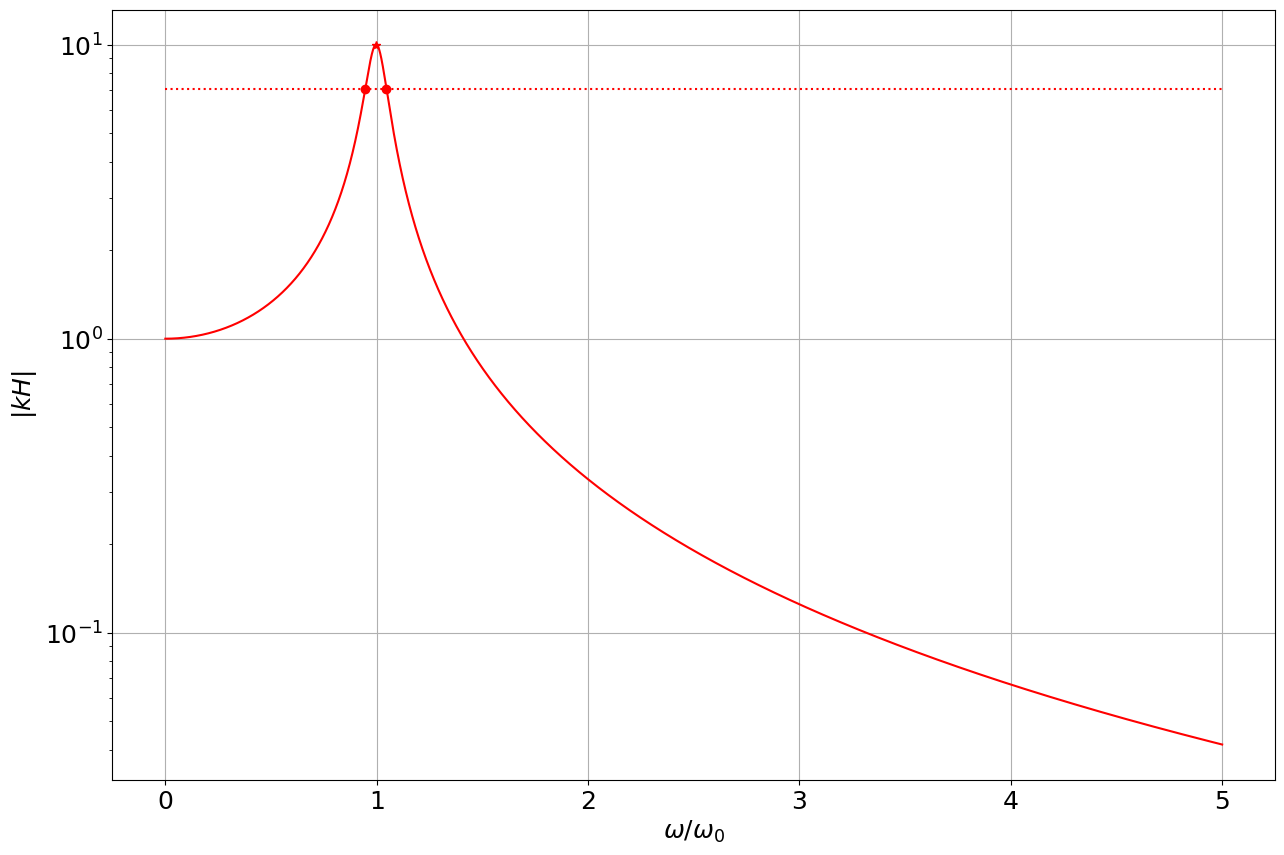

In [50]:
# Détermination de la largeur de bande à -3dB
kH_mod_max_sqrt2_m3=kH_mod_max_m3/np.sqrt(2)
kH_mod_max_sqrt2_m2=kH_mod_max_m2/np.sqrt(2)
kH_mod_max_sqrt2_m1=kH_mod_max_m1/np.sqrt(2)

ii_omega_1_m3=1
ii_omega_2_m3=1
ii_omega_1_m2=1
ii_omega_2_m2=1
ii_omega_1_m1=1
ii_omega_2_m1=1
diff_omega_1_m3=kH_mod_max_m3
diff_omega_2_m3=kH_mod_max_m3
diff_omega_1_m2=kH_mod_max_m2
diff_omega_2_m2=kH_mod_max_m2
diff_omega_1_m1=kH_mod_max_m1
diff_omega_2_m1=kH_mod_max_m1

for ii in range(len(omega)):
    if (np.abs(kH_mod_m3[ii]-kH_mod_max_sqrt2_m3)<diff_omega_1_m3) and (omega[ii]<omega_d_m3):
        diff_omega_1_m3=np.abs(kH_mod_m3[ii]-kH_mod_max_sqrt2_m3)
        ii_omega_1_m3=ii

    if (np.abs(kH_mod_m3[ii]-kH_mod_max_sqrt2_m3)<diff_omega_2_m3) and (omega[ii]>omega_d_m3):
        diff_omega_2_m3=np.abs(kH_mod_m3[ii]-kH_mod_max_sqrt2_m3)
        ii_omega_2_m3=ii

    if (np.abs(kH_mod_m2[ii]-kH_mod_max_sqrt2_m2)<diff_omega_1_m2) and (omega[ii]<omega_d_m2):
        diff_omega_1_m2=np.abs(kH_mod_m2[ii]-kH_mod_max_sqrt2_m2)
        ii_omega_1_m2=ii

    if (np.abs(kH_mod_m2[ii]-kH_mod_max_sqrt2_m2)<diff_omega_2_m2) and (omega[ii]>omega_d_m2):
        diff_omega_2_m2=np.abs(kH_mod_m2[ii]-kH_mod_max_sqrt2_m2)
        ii_omega_2_m2=ii

    if (np.abs(kH_mod_m1[ii]-kH_mod_max_sqrt2_m1)<diff_omega_1_m1) and (omega[ii]<omega_d_m1):
        diff_omega_1_m1=np.abs(kH_mod_m1[ii]-kH_mod_max_sqrt2_m1)
        ii_omega_1_m1=ii

    if (np.abs(kH_mod_m1[ii]-kH_mod_max_sqrt2_m1)<diff_omega_2_m1) and (omega[ii]>omega_d_m1):
        diff_omega_2_m1=np.abs(kH_mod_m1[ii]-kH_mod_max_sqrt2_m1)
        ii_omega_2_m1=ii

delta_omega_m3=omega[ii_omega_2_m3]-omega[ii_omega_1_m3]
delta_omega_m2=omega[ii_omega_2_m2]-omega[ii_omega_1_m2]
delta_omega_m1=omega[ii_omega_2_m1]-omega[ii_omega_1_m1]

plt.semilogy(omega/omega_0,kH_mod_m2,'r')

plt.plot(omega_d_m2/omega_0,kH_mod_max_m2,'r*')

plt.plot([omega[1]/omega_0,omega[-1]/omega_0],[kH_mod_max_sqrt2_m2,kH_mod_max_sqrt2_m2],'r:')

plt.plot(omega[ii_omega_1_m2]/omega_0,kH_mod_m2[ii_omega_1_m2],'ro')
plt.plot(omega[ii_omega_2_m2]/omega_0,kH_mod_m2[ii_omega_2_m2],'ro')

plt.grid()
plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("$| kH |$")


print("xim3_test",delta_omega_m3/omega_0/2)
print("xim2_test",delta_omega_m2/omega_0/2)
print("xim1_test",delta_omega_m1/omega_0/2)

In [51]:
### Résonnance en vitesse

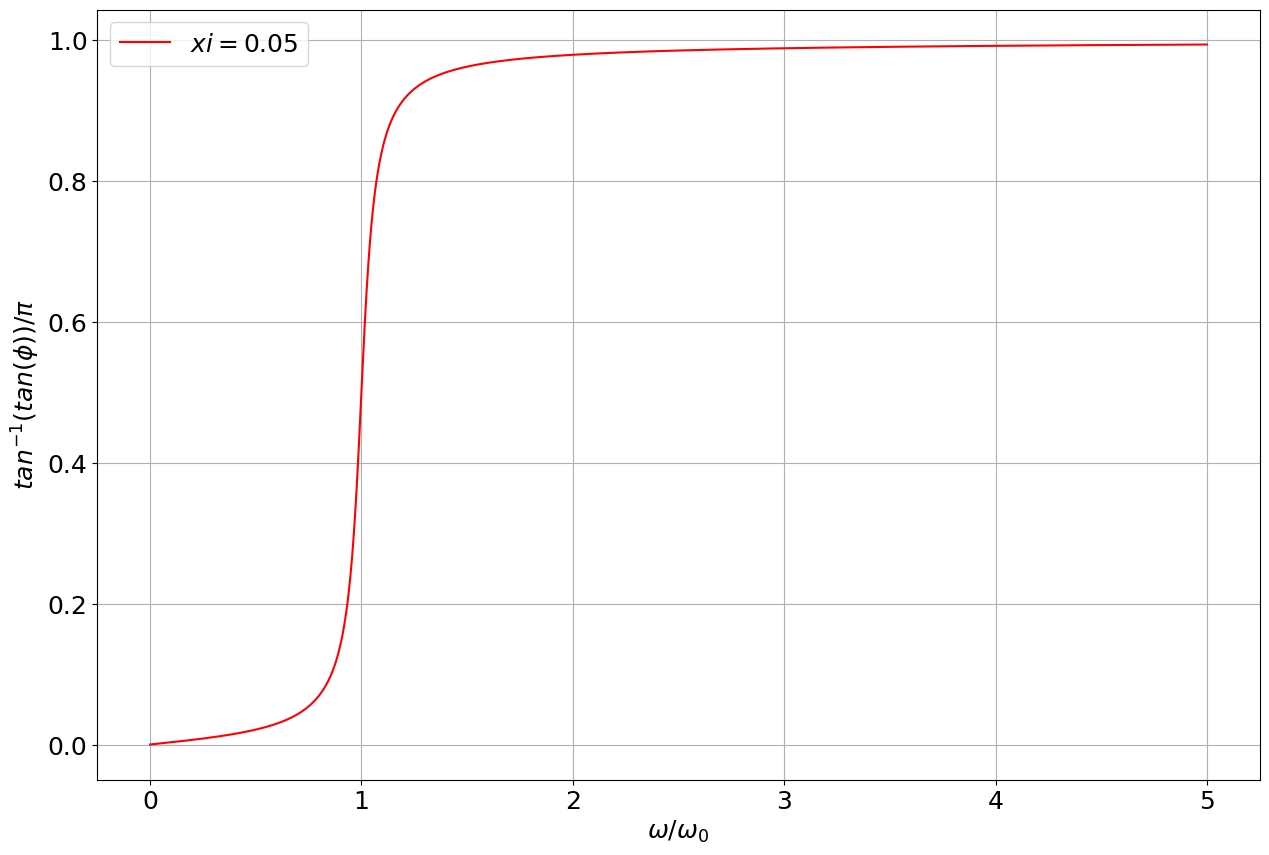

In [52]:
tan_phi_m3=2*xim3*omega/omega_0/(1-(omega**2)/(omega_0**2))
tan_phi_m2=2*xim2*omega/omega_0/(1-(omega**2)/(omega_0**2))
tan_phi_m1=2*xim1*omega/omega_0/(1-(omega**2)/(omega_0**2))
tan_phi_crit=2*omega/omega_0/(1-(omega**2)/(omega_0**2))
tan_phi_p1=2*xip1*omega/omega_0/(1-(omega**2)/(omega_0**2))

# Recalage pour affichage
phi_m3_corr=np.zeros(tan_phi_m3.shape)
phi_m2_corr=np.zeros(tan_phi_m2.shape)
phi_m1_corr=np.zeros(tan_phi_m1.shape)
phi_crit_corr=np.zeros(tan_phi_crit.shape)
phi_p1_corr=np.zeros(tan_phi_p1.shape)

for ii in range(len(np.arctan(tan_phi_m3))):
    if np.arctan(tan_phi_m3[ii])>0:
        phi_m3_corr[ii]=np.arctan(tan_phi_m3[ii])
    else:
        phi_m3_corr[ii]=np.arctan(tan_phi_m3[ii])+np.pi
        
    if np.arctan(tan_phi_m2[ii])>0:
        phi_m2_corr[ii]=np.arctan(tan_phi_m2[ii])
    else:
        phi_m2_corr[ii]=np.arctan(tan_phi_m2[ii])+np.pi
        
    if np.arctan(tan_phi_m1[ii])>0:
        phi_m1_corr[ii]=np.arctan(tan_phi_m1[ii])
    else:
        phi_m1_corr[ii]=np.arctan(tan_phi_m1[ii])+np.pi

    if np.arctan(tan_phi_crit[ii])>0:
        phi_crit_corr[ii]=np.arctan(tan_phi_crit[ii])
    else:
        phi_crit_corr[ii]=np.arctan(tan_phi_crit[ii])+np.pi

    if np.arctan(tan_phi_p1[ii])>0:
        phi_p1_corr[ii]=np.arctan(tan_phi_p1[ii])
    else:
        phi_p1_corr[ii]=np.arctan(tan_phi_p1[ii])+np.pi


plt.plot(omega/omega_0,phi_m2_corr/np.pi,'r')

plt.grid()
plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("$tan^{-1}(tan(\phi))/\pi$")
plt.legend(["$xi=0.05$"])

In [53]:
### Résonnance en puissance


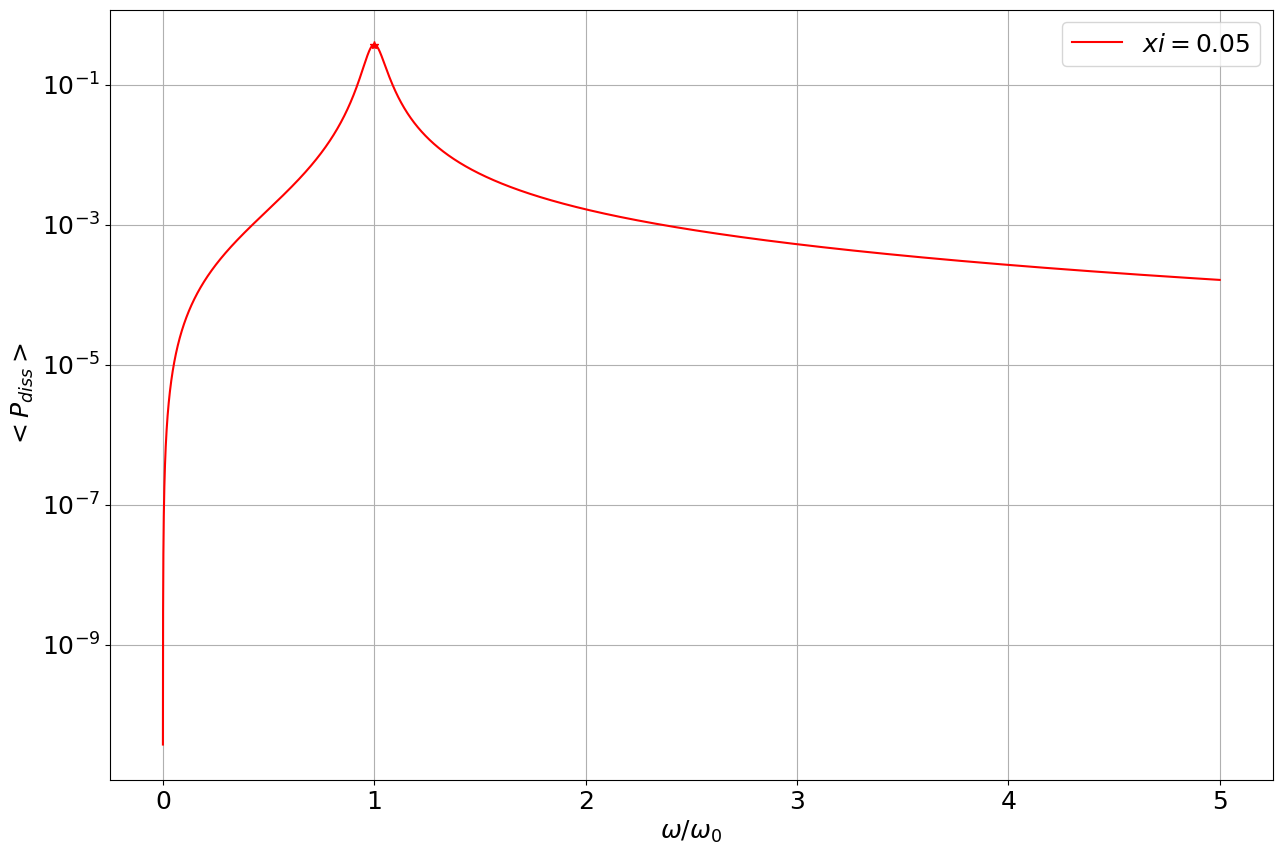

In [54]:
bm3=xim3*2*m*omega_0;bm2=xim2*2*m*omega_0;bm1=xim1*2*m*omega_0;bcrit=2*m*omega_0;bp1=xip1*2*m*omega_0

F0=1;

# Cas sous-amorti
Pdiss_m3=bm3/2*(F0*omega/k)**2/((1-(omega**2)/(omega_0**2))**2+4*xim3**2*(omega**2)/(omega_0**2))
Pdiss_max_m3=1/2*(F0**2)/bm3

Pdiss_m2=bm2/2*(F0*omega/k)**2/((1-(omega**2)/(omega_0**2))**2+4*xim2**2*(omega**2)/(omega_0**2))
Pdiss_max_m2=1/2*(F0**2)/bm2;

Pdiss_m1=bm1/2*(F0*omega/k)**2/((1-(omega**2)/(omega_0**2))**2+4*xim1**2*(omega**2)/(omega_0**2))
Pdiss_max_m1=1/2*(F0**2)/bm1

# Cas critique
Pdiss_crit=bcrit/2*(F0*omega/k)**2/((1-(omega**2)/(omega_0**2))**2+4*(omega**2)/(omega_0**2))
Pdiss_max_crit=1/2*(F0**2)/bcrit

# Cas sur-amorti
Pdiss_p1=bp1/2*(F0*omega/k)**2/((1-(omega**2)/(omega_0**2))**2+4*xip1**2*(omega**2)/(omega_0**2))
Pdiss_max_p1=1/2*(F0**2)/bp1

plt.semilogy(omega/omega_0,Pdiss_m2,'r')

plt.semilogy(1,Pdiss_max_m2,'r*');

plt.grid()
plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("$<P_{diss}>$")
plt.legend(["$xi=0.05$"])

In [55]:
### Résonnance en vitesse

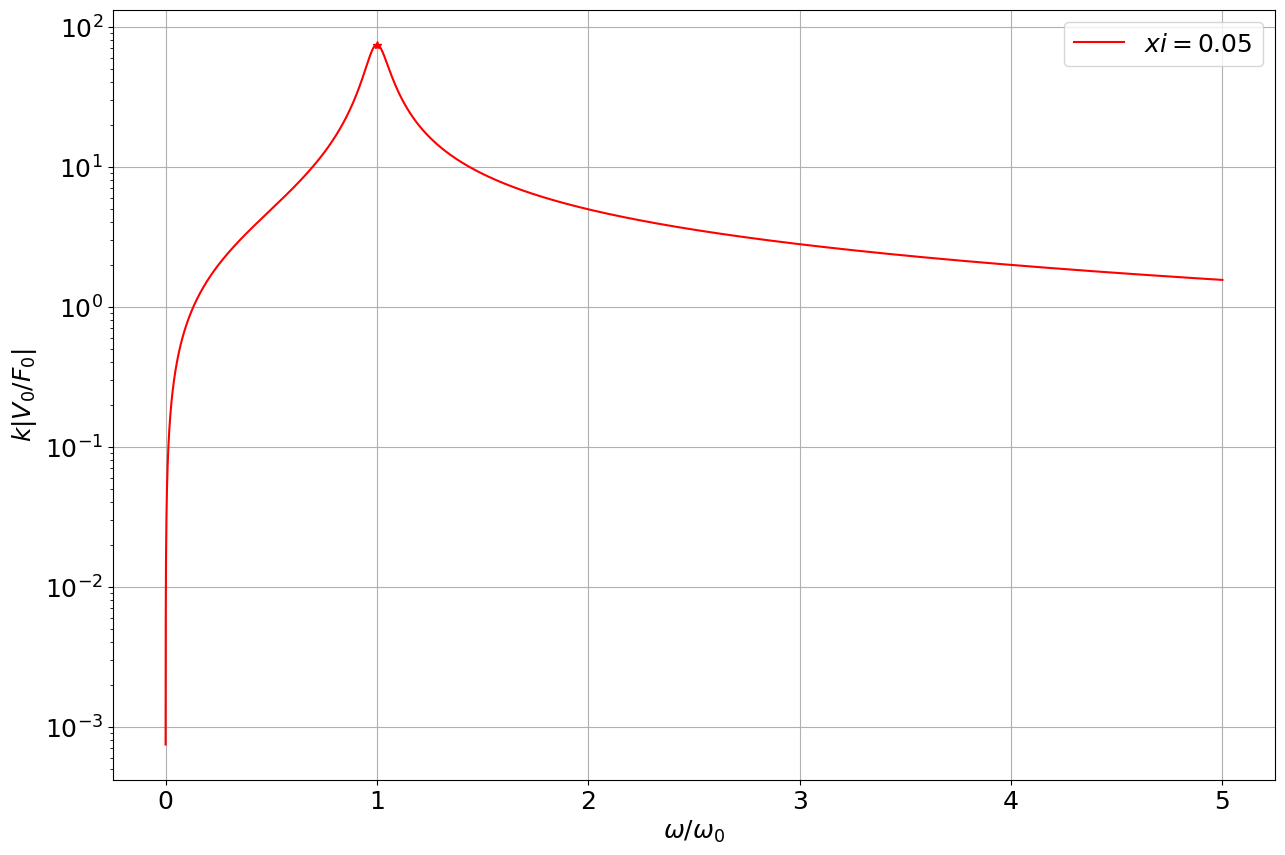

In [56]:
# Cas sous-amorti
kHv_m3=1j*omega/(1-(omega**2)/(omega_0**2)+1j*2*xim3*omega/omega_0)
kHv_mod_m3=omega/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xim3**2*(omega**2)/(omega_0**2))
kHv_mod_max_m3=omega_0/2/xim3

kHv_m2=1j*omega/(1-(omega**2)/(omega_0**2)+1j*2*xim2*omega/omega_0)
kHv_mod_m2=omega/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xim2**2*(omega**2)/(omega_0**2))
kHv_mod_max_m2=omega_0/2/xim2

kHv_m1=1j*omega/(1-(omega**2)/(omega_0**2)+1j*2*xim1*omega/omega_0)
kHv_mod_m1=omega/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xim1**2*(omega**2)/(omega_0**2))
kHv_mod_max_m1=omega_0/2/xim1

# Cas critique
kHv_crit=1j*omega/(1-(omega**2)/(omega_0**2)+1j*2*omega/omega_0)
kHv_mod_crit=omega/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*(omega**2)/(omega_0**2))
kHv_mod_max_crit=omega_0/2

# Cas sur-amorti
kHv_p1=1j* omega/(1-(omega**2)/(omega_0**2)+1j*2*xip1*omega/omega_0)
kHv_mod_p1=omega/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xip1**2*(omega**2)/(omega_0**2))
kHv_mod_max_p1=omega_0/2/xip1

plt.semilogy(omega/omega_0,kHv_mod_m2,'r')

plt.semilogy(1,kHv_mod_max_m2,'r*')

plt.grid()
plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("$k| V_{0}/F_{0} |$")
plt.legend(["$xi=0.05$"])

In [57]:
### Résonnance en accélération

Text(0, 0.5, '$k| \\Gamma_{0}/F_{0} |$')

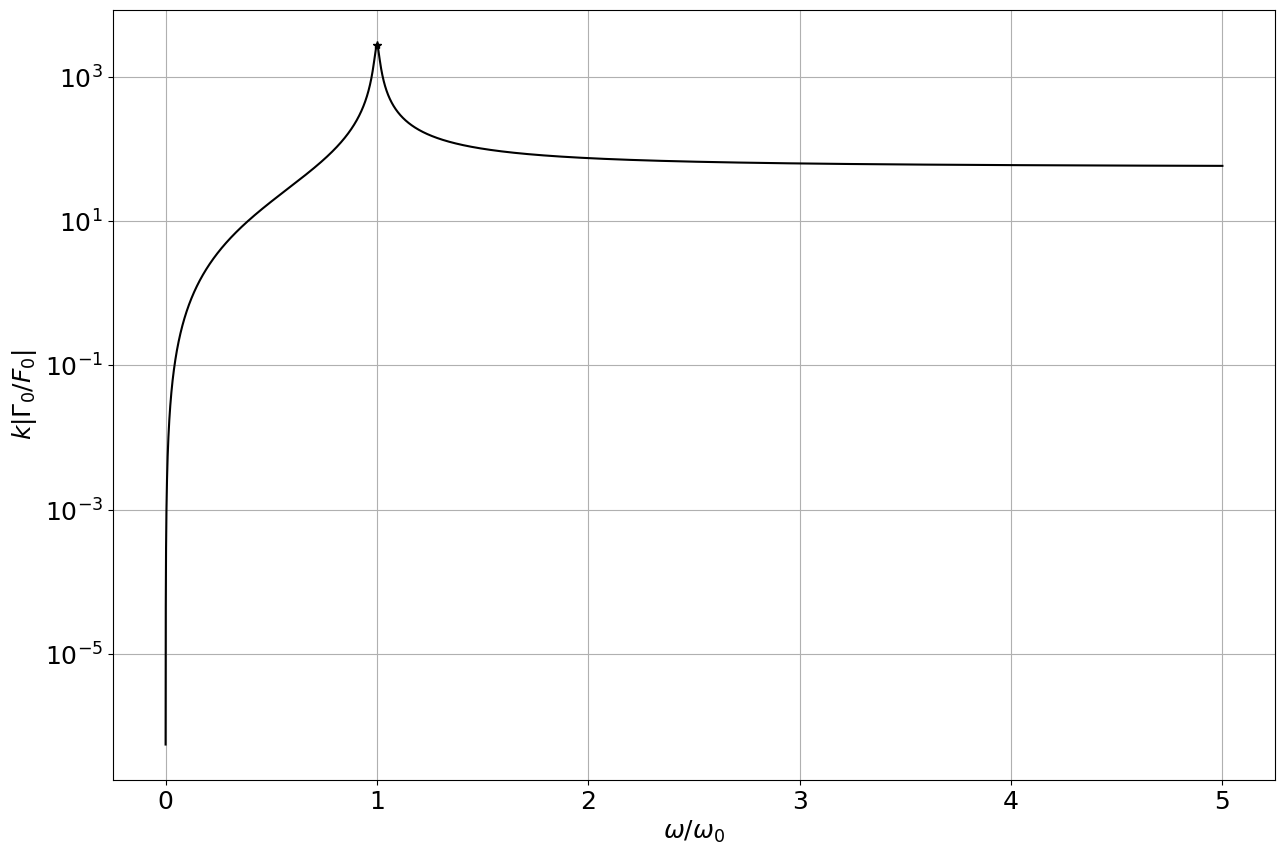

In [58]:
# Cas sous-amorti
kHa_m3=-omega**2/(1-(omega**2)/(omega_0**2)+1j*2*xim3*omega/omega_0)
kHa_mod_m3=omega**2/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xim3**2*(omega**2)/(omega_0**2))
omega_g_m3=omega_0/np.sqrt(1-2*xim3**2)
kHa_mod_max_m3=omega_0**2/(2*xim3*np.sqrt(1-xim3**2))

plt.semilogy(omega/omega_0,kHa_mod_m3,'k')

plt.semilogy(omega_g_m3/omega_0,kHa_mod_max_m3,'k*')

plt.grid()
plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("$k| \Gamma_{0}/F_{0} |$")
